In [23]:
# Libraries for data loading, data manipulation and data visulisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [24]:
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('train.csv')
df.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


In [25]:
df.shape

(15819, 3)

In [26]:
import nltk
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\u1121\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\u1121\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


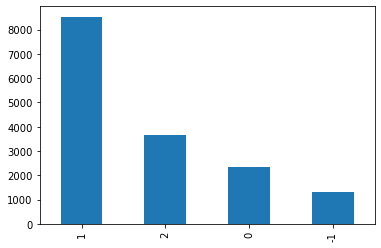

In [27]:
df['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

#### Text Cleaning

In [28]:
#remove urls
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

df.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late url-web url-web…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change url-web,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


In [29]:
# Lower case

df['message'] = df['message'].str.lower()
df.head()

,sentiment,message,tweetid
0,1,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via @mashable",625221
1,1,it's not like we lack evidence of anthropogenic global warming,126103
2,2,rt @rawstory: researchers say we have three years to act on climate change before it’s too late url-web url-web…,698562
3,1,#todayinmaker# wired : 2016 was a pivotal year in the war on climate change url-web,573736
4,1,"rt @soynoviodetodas: it's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #electionnight",466954


In [30]:
#remove punctuation
import string
def remove_punctuation(message):
    return ''.join([l for l in message if l not in string.punctuation])

df['message'] = df['message'].apply(remove_punctuation)
df.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via mashable,625221
1,1,its not like we lack evidence of anthropogenic global warming,126103
2,2,rt rawstory researchers say we have three years to act on climate change before it’s too late urlweb urlweb…,698562
3,1,todayinmaker wired 2016 was a pivotal year in the war on climate change urlweb,573736
4,1,rt soynoviodetodas its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight,466954


#### Feature Extraction using CountVectorizer

In [31]:
#import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
# create vectorizer instance
vect = CountVectorizer()

#fit vectorizer
vect_fit=vect.fit(df['message'])

In [33]:
# NUM of predictors
print(len(vect.vocabulary_))

24819


In [36]:
#transform features to numbers so modelling
vect_transform=vect.transform(df['message'])

# Get shape of our predictive variables
vect_transform.shape

(15819, 24819)

In [13]:
#total number of words in corpus
total_corpus=sum(vect_transform.toarray().sum(axis=0))
total_corpus

270970

We can seee that there are a lot more features(24 819) than rows (15 819) a lot of which correspond to words which only appear once. Not all of them are very useful, we must therefore tune vectorizer.

In [37]:
betterVect = CountVectorizer(stop_words='english',max_features=10000) 

betterVect.fit(df['message'])

CountVectorizer(max_features=10000, stop_words='english')

In [38]:
print(len(betterVect.vocabulary_))

10000


In [16]:
betterVect_transform=betterVect.transform(df['message'])

# Get shape of our predictive variables
betterVect_transform.shape

(15819, 10000)

In [17]:
#get total words in better corpus
total_better_corpus=sum(betterVect_transform.toarray().sum(axis=0))
total_better_corpus

170789

In [18]:
#percentage of words used 
feature_percentage=round((total_better_corpus/total_corpus)*100)
feature_percentage

63

In [19]:
#predictor names
#betterVect.get_feature_names()

### Training

In [20]:
X=betterVect_transform.toarray()
y=df['sentiment']

In [21]:
# import train/test split module
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [22]:
# import logistic regression module
from sklearn.linear_model import LogisticRegression

# create model object
lr = LogisticRegression(multi_class='ovr')

# train model
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

### Checking outcomes on the testing set

In [23]:
# Generate predictions
y_pred_test = lr.predict(X_test)

y_pred=pd.DataFrame(y_pred_test)

In [24]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

          -1       0.75      0.41      0.53       254
           0       0.61      0.46      0.53       457
           1       0.77      0.87      0.82      1736
           2       0.75      0.76      0.75       717

    accuracy                           0.75      3164
   macro avg       0.72      0.62      0.66      3164
weighted avg       0.74      0.75      0.74      3164



PREPARING TEST DATASET

In [45]:
df_test = pd.read_csv('test_with_no_labels.csv')
df_test.info(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


In [46]:
#remove urls
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_test['message'] = df_test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

df_test['message'] = df_test['message'].str.lower()

#remove punctuation
import string
def remove_punctuation(message):
    return ''.join([l for l in message if l not in string.punctuation])

df_test['message'] = df_test['message'].apply(remove_punctuation)



In [47]:
betterVect_test = CountVectorizer(stop_words='english',max_features=10000)

vect_fit_test=betterVect_test.fit(df_test['message'])

betterVect_transform_test=betterVect_test.transform(df_test['message'])

feat_test=betterVect_transform_test.toarray()

In [48]:
preds=lr.predict(feat_test)

In [49]:
len(preds)

10546

In [50]:
daf=pd.DataFrame(preds,columns=['sentiment'])
daf.head(2)

,sentiment
0,1
1,0


In [52]:
output=pd.DataFrame({'tweetid':df_test['tweetid']})
submission=output.join(daf)
submission.to_csv('submission.csv',index=False)

submission

,tweetid,sentiment
0,169760,1
1,35326,0
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,1
10542,875167,1
10543,78329,1
10544,867455,1


#### Graphical Multivariate

First we will create a word could image of the frequently twitted word in each of the different classes which are as follows:

* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

In [124]:
df_gm = df.copy()
df_gm.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via mashable,625221
1,1,its not like we lack evidence of anthropogenic global warming,126103
2,2,rt rawstory researchers say we have three years to act on climate change before it’s too late urlweb urlweb…,698562
3,1,todayinmaker wired 2016 was a pivotal year in the war on climate change urlweb,573736
4,1,rt soynoviodetodas its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight,466954


In [134]:
#create different dataframes for each of the classes
df_news= df_gm.drop(df[df.sentiment <= 1].index)

df_pro= df_gm.drop(df[df.sentiment<=0].index)
df_pro= df_gm.drop(df[df.sentiment>=2].index)

df_neutral= df_gm.drop(df[df.sentiment<=(-1)].index)
df_neutral= df_gm.drop(df[df.sentiment>=1].index)

df_anti= df_gm.drop(df[df.sentiment>=0].index)

In [126]:
import matplotlib.pyplot as plt
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

Text(0.5, 1.0, 'Anti Tweets')

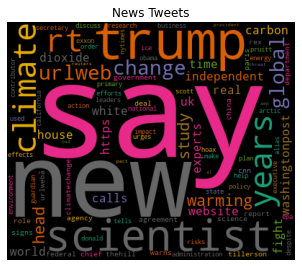

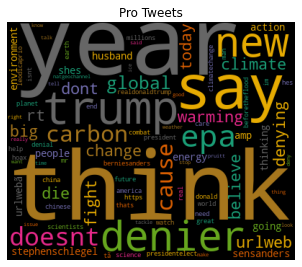

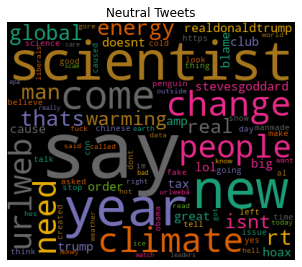

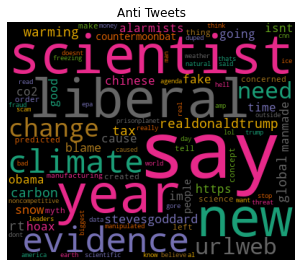

In [139]:
#create instance of WordCloud
wc=WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

#Create string of 100 words
wcVect = CountVectorizer(stop_words='english',max_features=100) 
wcVect.fit(df_news['message'])
text1=list(wcVect.vocabulary_)
text2=string = ' '.join(text1)

text2
#createWordCloud
a=wc.generate(string)

plt.figure(figsize = (4, 8), facecolor = None)
plt.imshow(a)
plt.axis("off")
plt.tight_layout(pad = 0);

plt.title("News Tweets")
##########################################################
#create instance of WordCloud
wc=WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

#Create string of 100 words
wcVect = CountVectorizer(stop_words='english',max_features=100) 
wcVect.fit(df_pro['message'])
text1=list(wcVect.vocabulary_)
text2=string = ' '.join(text1)

text2

#createWordCloud
b=wc.generate(string)


plt.figure(figsize = (4, 8), facecolor = None)
plt.imshow(b)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.title("Pro Tweets")
##################################################################
#create instance of WordCloud
wc=WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

#Create string of 100 words
wcVect = CountVectorizer(stop_words='english',max_features=100) 
wcVect.fit(df_neutral['message'])
text1=list(wcVect.vocabulary_)
text2=string = ' '.join(text1)

text2

#createWordCloud
c=wc.generate(string)


plt.figure(figsize = (4, 8), facecolor = None)
plt.imshow(c)
plt.axis("off")
plt.tight_layout(pad = 0);

plt.title("Neutral Tweets")

#########################################################
#create instance of WordCloud
wc=WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

#Create string of 100 words
wcVect = CountVectorizer(stop_words='english',max_features=100) 
wcVect.fit(df_anti['message'])
text1=list(wcVect.vocabulary_)
text2=string = ' '.join(text1)

text2

#createWordCloud
d=wc.generate(string)


plt.figure(figsize = (4, 8), facecolor = None)
plt.imshow(d)
plt.axis("off")
plt.tight_layout(pad = 0);

plt.title("Anti Tweets")


#### heatmap

In [140]:
df_hm = df.copy()

In [141]:
#Create string of 100 words
hmVect = CountVectorizer(stop_words='english',max_features=10) 
hmVect.fit(df_hm['message'])

CountVectorizer(max_features=10, stop_words='english')

In [149]:
hmVect.vocabulary_

{'doesnt': 4,
 'global': 5,
 'warming': 9,
 'urlweb': 8,
 'rt': 6,
 'climate': 3,
 'change': 2,
 'believe': 1,
 'amp': 0,
 'trump': 7}

In [145]:
hmVect_transform=hmVect.transform(df_hm['message'])
hmVect_array=hmVect_transform.toarray()
hmVect_array

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 2, 0],
       ...,
       [0, 1, 1, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 0]], dtype=int64)

In [151]:
df_feat= pd. DataFrame(hmVect_array, columns=['amp', 'believe', 'change','climate','doesnt','global','rt','trump','urlweb','warming'])
df_feat

,amp,believe,change,climate,doesnt,global,rt,trump,urlweb,warming
0,0,0,0,0,1,1,0,0,1,1
1,0,0,0,0,0,1,0,0,0,1
2,0,0,1,1,0,0,1,0,2,0
3,0,0,1,1,0,0,0,0,1,0
4,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
15814,0,0,0,0,0,1,1,0,0,1
15815,0,0,1,1,0,0,1,0,1,0
15816,0,1,1,1,0,0,1,1,1,0
15817,0,0,1,2,0,0,1,0,0,0


In [158]:
df_feat.head()

,amp,believe,change,climate,doesnt,global,rt,trump,urlweb,warming
0,0,0,0,0,1,1,0,0,1,1
1,0,0,0,0,0,1,0,0,0,1
2,0,0,1,1,0,0,1,0,2,0
3,0,0,1,1,0,0,0,0,1,0
4,0,0,1,1,0,0,1,0,0,0


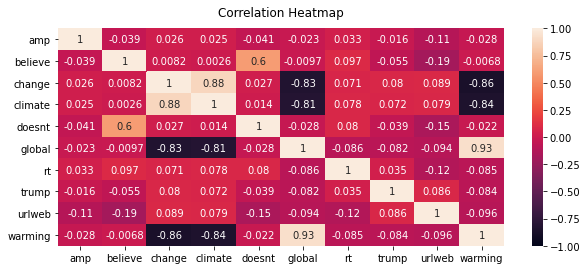

In [169]:
fig, ax = plt.subplots(figsize=(10,4)) 
heatmap = sns.heatmap(df_feat.corr(), vmin=-1, vmax=1, annot=True, ax=ax)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [155]:
df_feat.corr()

,amp,believe,change,climate,doesnt,global,rt,trump,urlweb,warming
amp,1.000000,-0.039021,0.026369,0.024500,-0.040837,-0.023187,0.033483,-0.015889,-0.106345,-0.028376
believe,-0.039021,1.000000,0.008243,0.002630,0.599995,-0.009690,0.096617,-0.054728,-0.187254,-0.006833
change,0.026369,0.008243,1.000000,0.884848,0.026828,-0.827549,0.070660,0.079581,0.088743,-0.862864
climate,0.024500,0.002630,0.884848,1.000000,0.013553,-0.807596,0.078387,0.072480,0.079156,-0.840245
doesnt,-0.040837,0.599995,0.026828,0.013553,1.000000,-0.027871,0.080386,-0.039310,-0.152219,-0.022419
global,-0.023187,-0.009690,-0.827549,-0.807596,-0.027871,1.000000,-0.085943,-0.081631,-0.093965,0.934514
rt,0.033483,0.096617,0.070660,0.078387,0.080386,-0.085943,1.000000,0.035165,-0.120964,-0.085170
trump,-0.015889,-0.054728,0.079581,0.072480,-0.039310,-0.081631,0.035165,1.000000,0.085676,-0.084415
urlweb,-0.106345,-0.187254,0.088743,0.079156,-0.152219,-0.093965,-0.120964,0.085676,1.000000,-0.095757
warming,-0.028376,-0.006833,-0.862864,-0.840245,-0.022419,0.934514,-0.085170,-0.084415,-0.095757,1.000000
